In [183]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [184]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


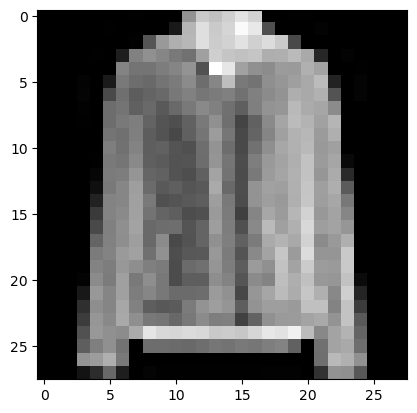

label is Shirt


In [185]:
# PART (a): 
# To Visualize a point in the dataset
index = 19
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

 42%|████▏     | 2124/5000 [01:01<01:22, 34.68it/s]


final loss: 0.0
l_2 squared norm of W: 659979038983.0


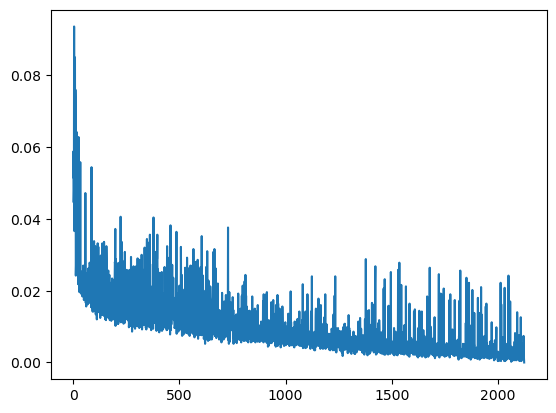

In [186]:
from tqdm import tqdm
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #
for index in tqdm(range(N)):
    count = 0
    for sample, label in zip(X_train_h,y_train):
        h = np.dot(W.flatten(),sample)
        out = np.sign(h)
        if label*out <= 0:
            W = W + (label*sample).reshape((-1,1))
            count += 1
    accuracy = ((np.sign((X_train_h @ W)) == (y_train)).sum().item())/N

    loss_hist.append(1-accuracy)
    if(accuracy == 1):
        break

plt.plot(loss_hist)
print(f"final loss: {loss_hist[-1]}")
print(f"l_2 squared norm of W: {(W**2).sum()}")



# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

In [187]:
# part (c)
test_accuracy = ((np.sign((X_test_h @ W)) == (y_test)).sum().item())/X_test_h.shape[0]
train_accuracy = ((np.sign((X_train_h @ W)) == (y_train)).sum().item())/N

print(f"Train Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Train Accuracy: 100.00%
Test Accuracy: 91.00%


## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [188]:
from codes.Logistic import Logistic

In [189]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
188442.90860327004


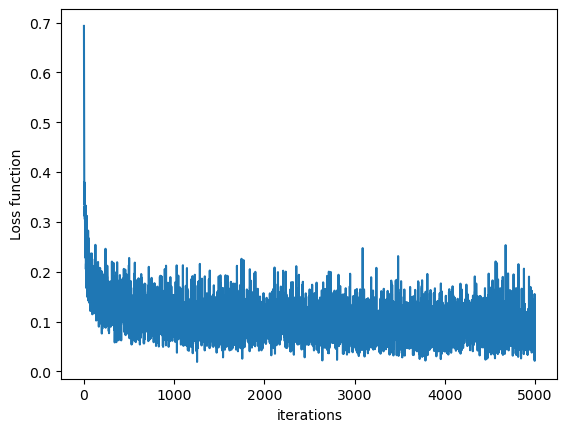

Weight squared norm 0.0002845508505496247
Final loss 0.0778539400821208


In [190]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

In [191]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

5.0 %


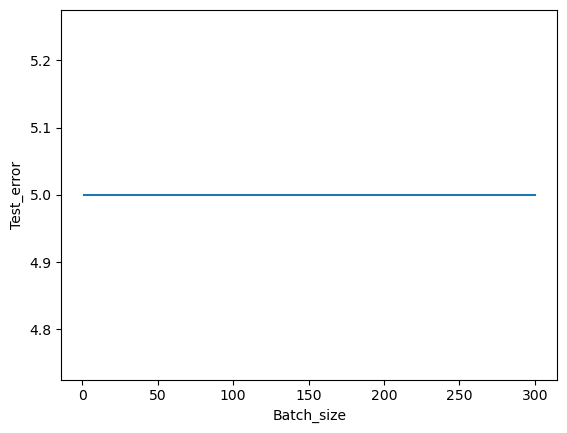

In [192]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Average the test error over 10 times
# ================================================================ #
for index, batch_size in enumerate(Batch):
    local_err = 0
    for _ in range(50):
        model = Logistic(d=d)
        model.train_LR(X_train,y_train,eta = 1e-5,batch_size=batch_size,num_iters=6000//batch_size)
        y_pred = logistic.predict(X_test)
        local_err += np.sum((y_test!=y_pred))*100/X_test.shape[0]
    test_err[index] = local_err/50

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

All of the batch sizes result in the same Test error

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [193]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


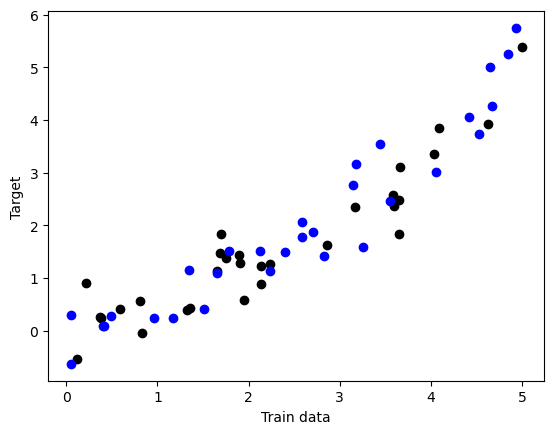

In [194]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

The data seems fairly linear, so I would guess that Linear regression will be effective

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [195]:
from codes.Regression import Regression

In [196]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.282380633012861
Gradient value [ -3.19217252 -10.44504584]


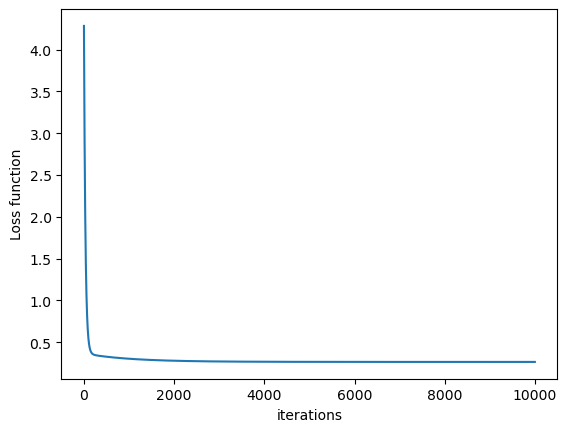

[[-0.37469204]
 [ 0.88377017]]
Final loss: 0.2641846537670641


In [197]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

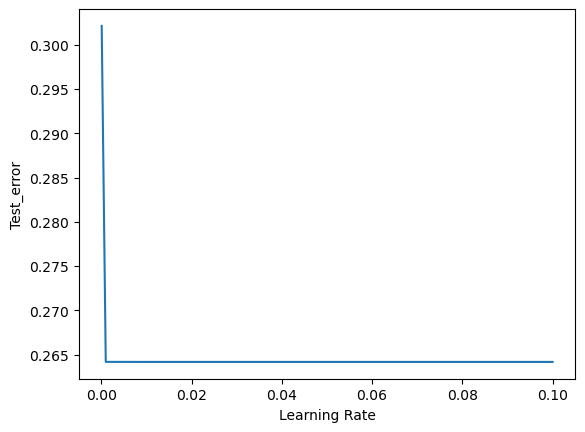

In [202]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #
for index, lr in enumerate(lrs):
    local_err = 0
    for _ in range(10):
        model = Regression(m=1)
        loss_history, weights = model.train_LR(X_train,y_train,eta = lr,batch_size=30,num_iters=10000)
        local_err += loss_history[-1]
    test_err[index] = local_err/10
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [199]:
## PART (e): 
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.2641793820396443
Optimal solution gradient [1.03620816e-16 3.88578059e-16]


0.2641793820396443 1 [11.56395323]
0.18253786843631917 2 [7.53048962]
0.15938695015088825 3 [6.68081948]
0.1589365360322952 4 [6.51300382]
0.15829698330417463 5 [6.73450683]
0.1582452060656314 6 [6.79913098]
0.13330657745309468 7 [9.7616348]
0.12905252865524788 8 [9.72442829]
0.11292062295315373 9 [14.01834163]
0.10224239717220232 10 [18.67641918]


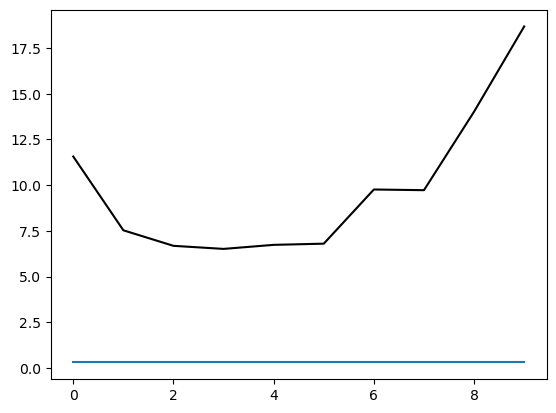

In [200]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for index, m in enumerate(range(1,11)):
    model = Regression(m)
    loss, w = model.closed_form(X_train,y_train)
    train_loss[index] = loss_history[-1]
    N, d = X_test.shape
    test_loss[index] = ((model.predict(X_test).reshape(N,1) - y_test.reshape(N,1))**2).sum(axis=0)
    print(loss, m, test_loss[index])
    
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

I would say that the degree 2 or 3 polynomial best fits the data. It is evident that after 6 or more degrees, the data was overfit,  as can be seen by increasing test loss.

0.10224239717220232 10 [18.67641918]
1.5340739821442886 10 [18.65551569]
1.5376592918845928 10 [18.33134089]
1.5577191506525172 10 [17.00723259]
1.6043373254160622 10 [15.53184997]
1.793591683333354 10 [12.23337084]
2.0893972280749855 10 [9.54112697]
2.170542050046961 10 [9.34763918]
2.1834338116830643 10 [9.3626512]
2.212331911549687 10 [9.39623695]


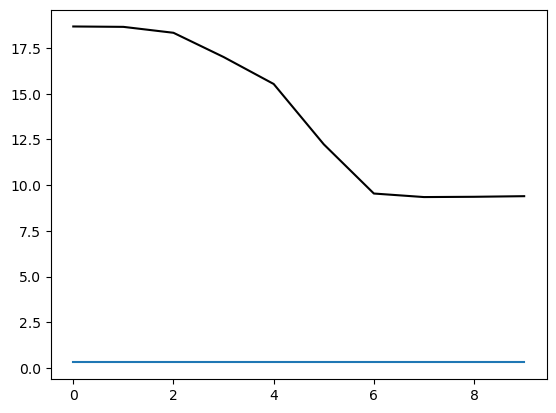

In [201]:
#PART (i): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
m = 10
for index, l in enumerate([0,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]):
    model = Regression(m, reg_param=l)
    loss, w = model.closed_form(X_train,y_train)
    train_loss[index] = loss_history[-1]
    N, d = X_test.shape
    test_loss[index] = ((model.predict(X_test).reshape(N,1) - y_test.reshape(N,1))**2).sum(axis=0)
    print(loss, m, test_loss[index])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

Lambda = 1e-2 produces the lowest loss of 9.347 so it might work the best.